In [1]:
!unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: archive (6)/2010.csv    
  inflating: archive (6)/2011.csv    
  inflating: archive (6)/2012.csv    
  inflating: archive (6)/2013.csv    
  inflating: archive (6)/2014.csv    
  inflating: archive (6)/2015.csv    
  inflating: archive (6)/2016.csv    
  inflating: archive (6)/2017.csv    
  inflating: archive (6)/2018.csv    
  inflating: archive (6)/2019.csv    
  inflating: archive (6)/2020.csv    
  inflating: archive (6)/2021.csv    
  inflating: archive (6)/2022.csv    


Code for updating dataset every 15 minutes

In [ ]:
import pandas as pd
import glob
import time

while True:
    # get all CSV files in a directory
    path = r'/content/archive (6)/*.csv'
    all_files = glob.glob(path)

    # combine files into one dataframe
    df_combined = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

    # write the combined dataframe to a new CSV file
    df_combined.to_csv('combined_file.csv', index=False)

    # read the combined file into a dataframe
    chicago_crime = pd.read_csv("combined_file.csv")
    print(chicago_crime.columns)

    # pause the code for 15 minutes
    time.sleep(900)  # 900 seconds = 15 minutes


In [5]:
import pandas as pd
import glob

# get all CSV files in a directory
path = r'/content/archive (6)/*.csv'
all_files = glob.glob(path)

# combine files into one dataframe
df_combined = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

# write the combined dataframe to a new CSV file
df_combined.to_csv('combined_file.csv', index=False)
chicago_crime = pd.read_csv("combined_file.csv")
print(chicago_crime.columns)


In [21]:
print(chicago_crime.shape)
print(chicago_crime.head())
print(chicago_crime.columns)



(3572708, 25)
          ID Case Number       Date                   Block  IUCR  \
1   10342825    HY533211 2010-01-01    056XX W EASTWOOD AVE  1752   
5   11033112    JA366109 2010-01-01         047XX S WOOD ST  1562   
8    7296936    HS100025 2010-01-01      031XX W MADISON ST  0486   
9    7296951    HS100091 2010-01-01  089XX S BLACKSTONE AVE  1310   
10   7297081    HS100411 2010-01-01   046XX S WENTWORTH AVE  0620   

                  Primary Type                    Description  \
1   OFFENSE INVOLVING CHILDREN  AGG CRIM SEX ABUSE FAM MEMBER   
5                  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
8                      BATTERY        DOMESTIC BATTERY SIMPLE   
9              CRIMINAL DAMAGE                    TO PROPERTY   
10                    BURGLARY                 UNLAWFUL ENTRY   

       Location Description  Arrest  Domestic  ...  X Coordinate  \
1                 RESIDENCE   False      True  ...     1137897.0   
5                 RESIDENCE   False      Tru

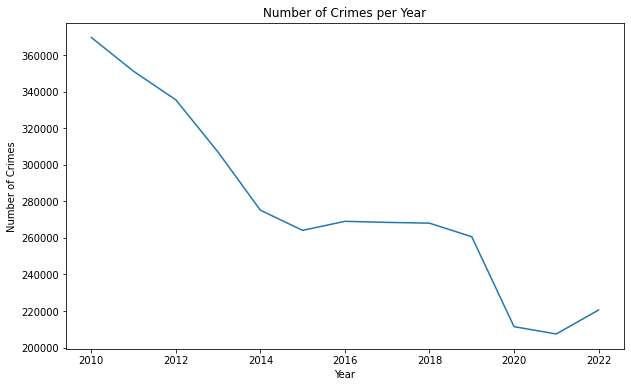

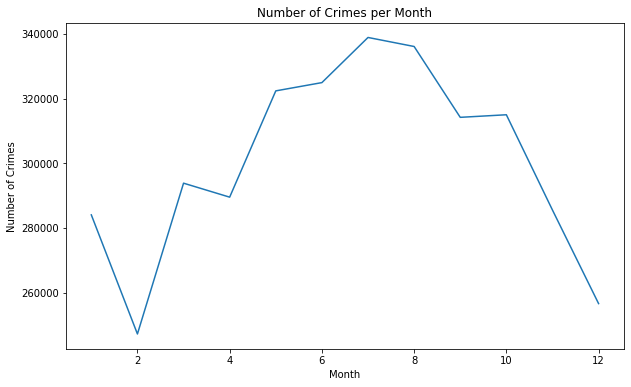

In [8]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the year and month from the 'Date' column
chicago_crime['Year'] = chicago_crime['Date'].dt.year
chicago_crime['Month'] = chicago_crime['Date'].dt.month

# Count the number of crimes per year and plot the trend
crime_count_year = chicago_crime.groupby(['Year'])['ID'].count()
crime_count_year.plot(kind='line', figsize=(10,6))
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

# Count the number of crimes per month and plot the trend
crime_count_month = chicago_crime.groupby(['Month'])['ID'].count()
crime_count_month.plot(kind='line', figsize=(10,6))
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()


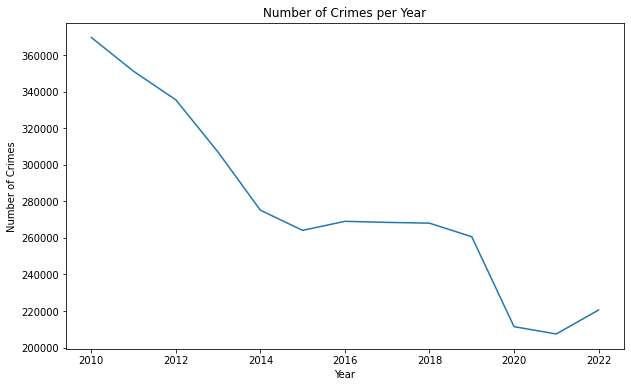

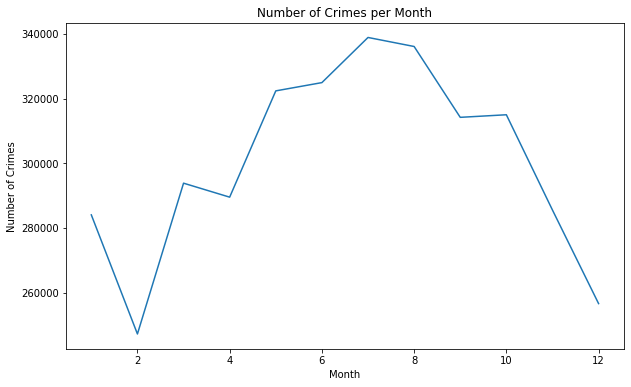

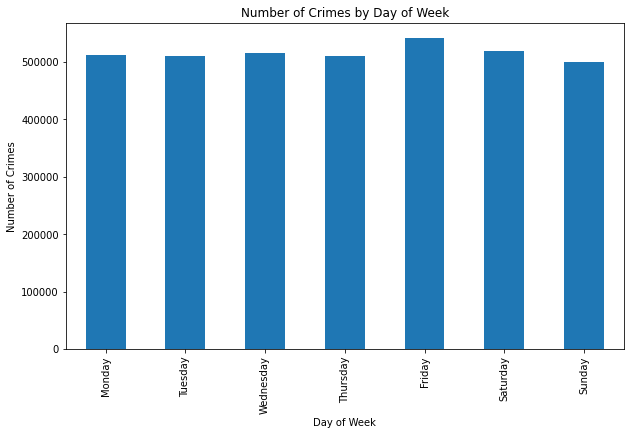

In [9]:
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date'], format='%m/%d/%Y %I:%M:%S %p')

chicago_crime['Year'] = chicago_crime['Date'].dt.year
chicago_crime['Month'] = chicago_crime['Date'].dt.month
chicago_crime['Day of Week'] = chicago_crime['Date'].dt.dayofweek

crime_count_year = chicago_crime.groupby(['Year'])['ID'].count()
crime_count_year.plot(kind='line', figsize=(10,6))
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

crime_count_month = chicago_crime.groupby(['Month'])['ID'].count()
crime_count_month.plot(kind='line', figsize=(10,6))
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

day_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_count_dayofweek = chicago_crime.groupby(['Day of Week'])['ID'].count()
crime_count_dayofweek.index = day_of_week_names
crime_count_dayofweek.plot(kind='bar', figsize=(10,6))
plt.title('Number of Crimes by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()

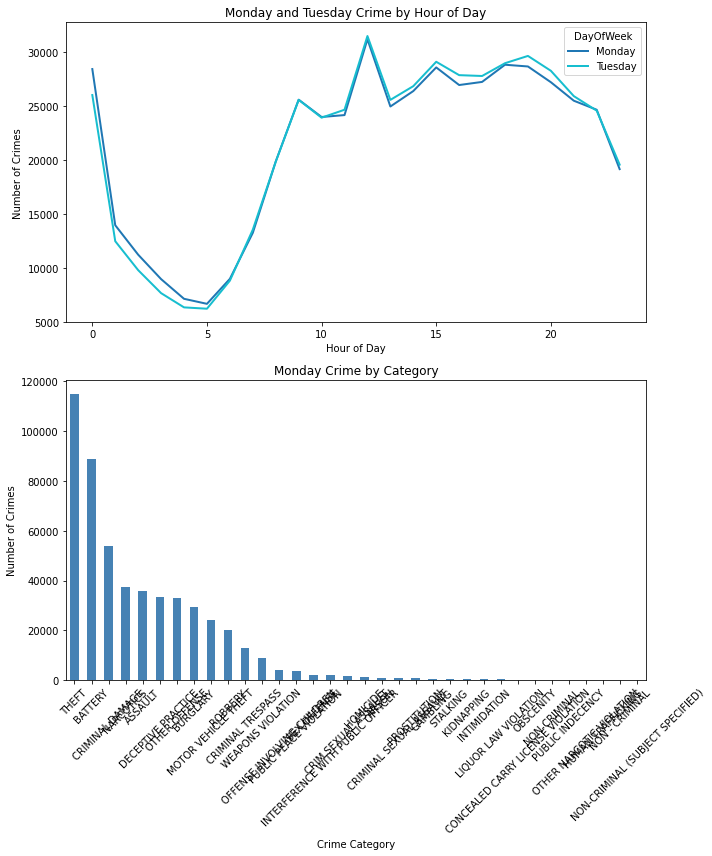

In [18]:
# Convert the 'Date' column to datetime format
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the day of the week from the 'Date' column
chicago_crime['Hour'] = chicago_crime['Date'].dt.hour
chicago_crime['DayOfWeek'] = chicago_crime['Date'].dt.day_name()

# Subset the data to only include Monday and Tuesday
mon_tue_crime = chicago_crime.loc[chicago_crime['DayOfWeek'].isin(['Monday', 'Tuesday'])]

# Create a pivot table of crime counts by hour and day of week
crime_by_hour = mon_tue_crime.pivot_table(index='Hour', columns='DayOfWeek', values='ID', aggfunc='count')

# Plot the pivot table
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Monday and Tuesday crime against time of the day
crime_by_hour.plot(ax=axs[0], kind='line', lw=2, colormap='tab10', legend=True)
axs[0].set_title('Monday and Tuesday Crime by Hour of Day')
axs[0].set_xlabel('Hour of Day')
axs[0].set_ylabel('Number of Crimes')

# Plot 2: Monday crime by crime category
mon_crime = mon_tue_crime.loc[mon_tue_crime['DayOfWeek'] == 'Monday']
mon_crime_counts = mon_crime['Primary Type'].value_counts()
mon_crime_counts.plot(ax=axs[1], kind='bar', color='steelblue', legend=False)
axs[1].set_title('Monday Crime by Category')
axs[1].set_xlabel('Crime Category')
axs[1].set_ylabel('Number of Crimes')
axs[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


In [10]:
from datetime import datetime
# Preprocess the data
chicago_crime["Date"] = pd.to_datetime(chicago_crime["Date"])
chicago_crime["Hour"] = chicago_crime["Date"].dt.hour
chicago_crime["DayOfWeek"] = chicago_crime["Date"].dt.dayofweek

# Extract relevant features
features = ["Hour", "DayOfWeek"]
target = ["Arrest"]

# Split data into training and testing sets
train_size = int(len(chicago_crime) * 0.8)
train = chicago_crime.iloc[:train_size]
test = chicago_crime.iloc[train_size:]

# Train a model to make the prediction
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train[features], train[target])

# Make predictions on the test set
predictions = model.predict(test[features])

# Evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test[target], predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7897371229023183


In [11]:
# Preprocess the data
chicago_crime["Date"] = pd.to_datetime(chicago_crime["Date"])
chicago_crime["DayOfWeek"] = chicago_crime["Date"].dt.day_name()
chicago_crime["Hour"] = chicago_crime["Date"].dt.hour

# Group the data by day of week and hour
grouped_df = chicago_crime.groupby(["DayOfWeek", "Hour"])["Location Description"].apply(lambda x: x.mode()[0]).reset_index()

# Function to make a prediction
def predict(day_of_week, hour):
    try:
        prediction = grouped_df[(grouped_df["DayOfWeek"] == day_of_week) & (grouped_df["Hour"] == hour)]["Location Description"].values[0]
        return prediction
    except:
        return "Not enough data for this day and hour."

# Test the prediction function
day_of_week = "Monday"
hour = 13
prediction = predict(day_of_week, hour)
print(f"The most likely location for a crime on {day_of_week} at {hour}h is {prediction}.")


The most likely location for a crime on Monday at 13h is STREET.


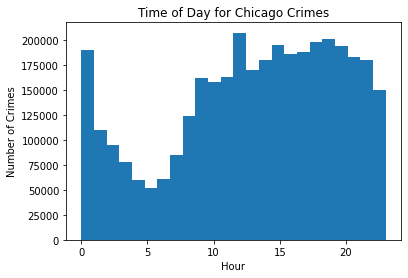

In [20]:
import folium
from folium.plugins import HeatMap

# Convert the date column to a datetime object and extract the hour
chicago_crime['Date'] = pd.to_datetime(chicago_crime['Date'], format='%m/%d/%Y %I:%M:%S %p')
chicago_crime['hour'] = chicago_crime['Date'].dt.hour

# Drop rows with missing latitude or longitude values
chicago_crime = chicago_crime.dropna(subset=['Latitude', 'Longitude'])

# Plot a histogram of the time of day when crimes occur
plt.hist(chicago_crime['hour'], bins=24)
plt.title('Time of Day for Chicago Crimes')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes')
plt.show()

# Plot a heatmap of the location of crimes
crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(data=chicago_crime[['Latitude', 'Longitude']], radius=15).add_to(crime_map)
crime_map


In [25]:
features = ['DayOfWeek', 'Hour', 'Location Description', 'Arrest', 'Domestic']
target = 'Primary Type'
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Instantiate LabelEncoder
le = LabelEncoder()

# Encode 'DayOfWeek' and 'Location Description' columns
chicago_crime.loc[:, 'DayOfWeek'] = le.fit_transform(chicago_crime['DayOfWeek'])
chicago_crime.loc[:, 'Location Description'] = le.fit_transform(chicago_crime['Location Description'])

# Preview encoded DataFrame
print(chicago_crime.head())

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(chicago_crime[features], chicago_crime[target], test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# create random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# train classifier on training data
rfc.fit(X_train, y_train)
# predict on test data
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


<ipython-input-25-79b9c7b912b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_crime.loc[:, 'DayOfWeek'] = le.fit_transform(chicago_crime['DayOfWeek'])
<ipython-input-25-79b9c7b912b7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_crime.loc[:, 'Location Description'] = le.fit_transform(chicago_crime['Location Description'])


          ID Case Number       Date                   Block  IUCR  \
1   10342825    HY533211 2010-01-01    056XX W EASTWOOD AVE  1752   
5   11033112    JA366109 2010-01-01         047XX S WOOD ST  1562   
8    7296936    HS100025 2010-01-01      031XX W MADISON ST  0486   
9    7296951    HS100091 2010-01-01  089XX S BLACKSTONE AVE  1310   
10   7297081    HS100411 2010-01-01   046XX S WENTWORTH AVE  0620   

                  Primary Type                    Description  \
1   OFFENSE INVOLVING CHILDREN  AGG CRIM SEX ABUSE FAM MEMBER   
5                  SEX OFFENSE      AGG CRIMINAL SEXUAL ABUSE   
8                      BATTERY        DOMESTIC BATTERY SIMPLE   
9              CRIMINAL DAMAGE                    TO PROPERTY   
10                    BURGLARY                 UNLAWFUL ENTRY   

    Location Description  Arrest  Domestic  ...  X Coordinate  Y Coordinate  \
1                    147   False      True  ...     1137897.0     1930354.0   
5                    147   False    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4203335843099496
Precision: 0.3628694165322345
Recall: 0.4203335843099496
F1 score: 0.3477838718238672
